# Import packages

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Import the dataframe

In [34]:
# Import the dataframe
df: pd.DataFrame = pd.read_csv('Datasets/cleaned_data.csv')

# Change the Dtype of all the date to DateType instead of an object
df['datum'] = pd.to_datetime(df['datum'])
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'], dayfirst=True)
df['startdatum'] = pd.to_datetime(df['startdatum'])
df['einddatum'] = pd.to_datetime(df['einddatum'])

# Show all the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48849 entries, 0 to 48848
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   werknemer_id      48849 non-null  int64         
 1   datum             48849 non-null  datetime64[ns]
 2   geboortedatum     48849 non-null  datetime64[ns]
 3   startdatum        48849 non-null  datetime64[ns]
 4   einddatum         48849 non-null  datetime64[ns]
 5   leeftijd          48849 non-null  float64       
 6   dienstperiode     0 non-null      float64       
 7   stad              48849 non-null  object        
 8   afdeling          48849 non-null  object        
 9   klant_id          48849 non-null  int64         
 10  geslacht_id       48849 non-null  object        
 11  geslacht          48849 non-null  object        
 12  uitdienst_reden   48849 non-null  object        
 13  status_jaar       48849 non-null  int64         
 14  status            4884

# Feature engineering

In [35]:
#Een nieuwe column waarin staat wat de afstand tot amsterdam is van de steden
coordinates = {
    'Amstelveen': (52.3121, 4.8704),
    'Utrecht': (52.0907, 5.1214),
    'Amsterdam': (52.3676, 4.9041),
    'Den Haag': (52.0705, 4.3007),
    'Leiden': (52.1601, 4.4970),
    'Dordrecht': (51.8133, 4.6901),
    'Barendrecht': (51.8530, 4.5343),
    'Eindhoven': (51.4416, 5.4697),
    'Breda': (51.5719, 4.7683),
    'Tilburg': (51.5555, 5.0913),
    'Rotterdam': (51.9225, 4.4792),
    'Rijswijk': (52.0377, 4.3214),
    'Haarlem': (52.3874, 4.6462),
    'Zaandam': (52.4387, 4.8183),
    'Gouda': (52.0116, 4.7104),
    'Schiedam': (51.9194, 4.3883),
    'Zeist': (52.0907, 5.1804),
    'Middelburg': (51.4988, 3.6100),
    'Almere': (52.3508, 5.2647),
    'Zoetermeer': (52.0571, 4.4936),
    'Veenendaal': (52.0289, 5.5580),
    'Delft': (52.0116, 4.3571),
    'Hoogeveen': (52.7227, 6.4901),
    'Lelystad': (52.5185, 5.4714),
    'Roermond': (51.1942, 5.9871),
    'Alphen aan den Rijn': (52.1277, 4.6575),
    'Capelle': (51.9304, 4.5809),
    'Pijnacker': (52.0153, 4.4255),
    'Alblasserdam': (51.8625, 4.6600),
    'Woerden': (52.0848, 4.8835)
}

def calculate_distance(lat1, lon1, lat2, lon2) -> float:
    R: int = 6371 

    d_lat: float = math.radians(lat2 - lat1)
    d_lon: float = math.radians(lon2 - lon1)

    a: float = math.sin(d_lat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(d_lon / 2) ** 2
    c: float = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance: float = R * c
    return distance

# amsterdam_lat, amsterdam_lon = 52.3676, 4.9041

def calculate_distance_city(city_coordinates):
    distances: list [float] = []
    for index, row in df.iterrows():
        city_name = row['stad']
        if city_name in coordinates:
            city_lat, city_lon = coordinates[city_name]
            distance = calculate_distance(city_coordinates[0], city_coordinates[1], city_lat, city_lon)
            distances.append(distance)
        else:
            distances.append('Onbekend') 
            print(f"Coordinates not found for city: {city_name}") 
    return distances

def get_average_distance() -> list:
    amsterdam = calculate_distance_city(coordinates['Amsterdam'])
    utrecht = calculate_distance_city(coordinates['Utrecht'])
    rotterdam = calculate_distance_city(coordinates['Rotterdam'])
    
    average_distance: list [int] = [int(amsterdam[i] + utrecht[i] + rotterdam[i] / 3) for i in range(len(amsterdam))]
    return average_distance

df['reisafstand'] = get_average_distance()

# Create new dummies

In [36]:
df: pd.DataFrame = pd.get_dummies(df, columns=['afdeling'])
df = pd.get_dummies(df, columns=['business_unit'])
df = pd.get_dummies(df, columns=['uitdienst_reden'])
dummy_row_gender = pd.get_dummies(df['geslacht'], prefix='geslacht_id')
df = pd.concat([df, dummy_row_gender], axis=1)
df.columns

Index(['werknemer_id', 'datum', 'geboortedatum', 'startdatum', 'einddatum',
       'leeftijd', 'dienstperiode', 'stad', 'klant_id', 'geslacht_id',
       'geslacht', 'status_jaar', 'status', 'status_actief',
       'status_beëindigd', 'reisafstand', 'afdeling_Accountant',
       'afdeling_Administratief medewerker', 'afdeling_BI',
       'afdeling_Boekhouder', 'afdeling_Business analist',
       'afdeling_Business controller', 'afdeling_Business development',
       'afdeling_Credit controller', 'afdeling_Financial controller',
       'afdeling_HR', 'afdeling_IT', 'afdeling_Legal', 'afdeling_Marketing',
       'afdeling_Office manager', 'afdeling_Project controller',
       'business_unit_Detachering', 'business_unit_Intern',
       'uitdienst_reden_Niet van toepassing', 'uitdienst_reden_Ontslag',
       'uitdienst_reden_Vertrek', 'geslacht_id_Man', 'geslacht_id_Vrouw'],
      dtype='object')

In [37]:
# Visualisation with dummies

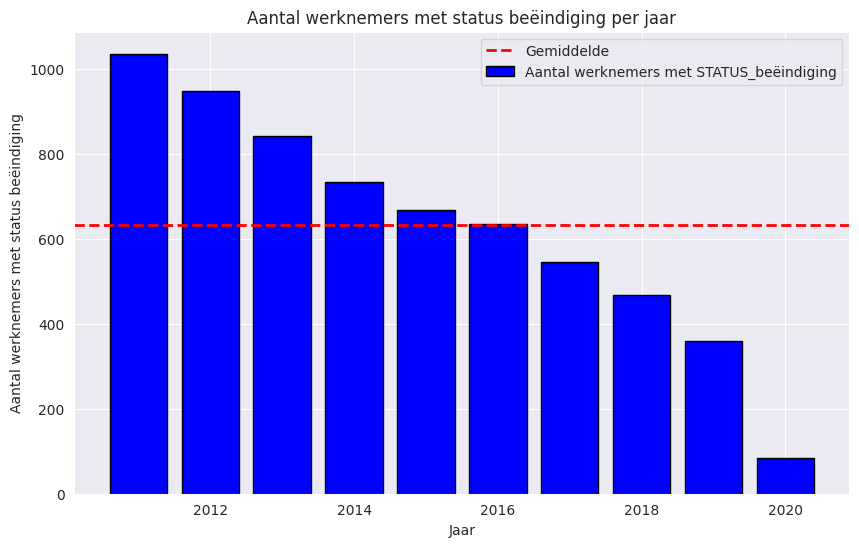

In [38]:
#Visualisaties met dummies
#Histogram van het aantal werknemers met STATUS beëindiging per jaar

df_beindigd = df[df['status_beëindigd'] == 1]

plt.figure(figsize=(10, 6))
plt.bar(df_beindigd['status_jaar'].value_counts().index, df_beindigd['status_jaar'].value_counts().values, color='blue', edgecolor='black', label='Aantal werknemers met STATUS_beëindiging')
plt.axhline(y=df_beindigd['status_jaar'].value_counts().mean(), color='red', linestyle='dashed', linewidth=2, label='Gemiddelde')

plt.xlabel('Jaar')
plt.ylabel('Aantal werknemers met status beëindiging')
plt.title('Aantal werknemers met status beëindiging per jaar')
plt.legend()
plt.show()

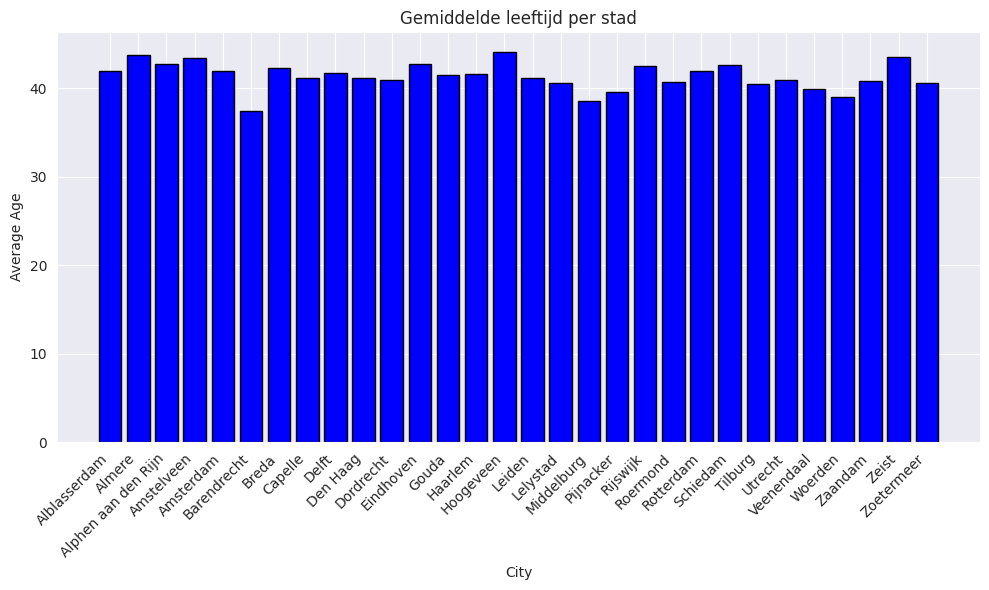

In [39]:
#deze plot is gemaakt om te zien of de leeftijd erg verschilt per stad, dit blijkt mee te vallen
#hierdoor is er gekozen om geen andere technieken te gebruiken dan de modus om NaN values in stad in te vullen met Overige
import pandas as pd
import matplotlib.pyplot as plt

average_age_per_city = df.groupby('stad')['leeftijd'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_age_per_city['stad'], average_age_per_city['leeftijd'], color='blue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Average Age')
plt.title('Gemiddelde leeftijd per stad')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

/tmp/ipykernel_34026/4167038271.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='stad', y='Count', hue='Reason', data=melted_reasons, color='blue', edgecolor='black')


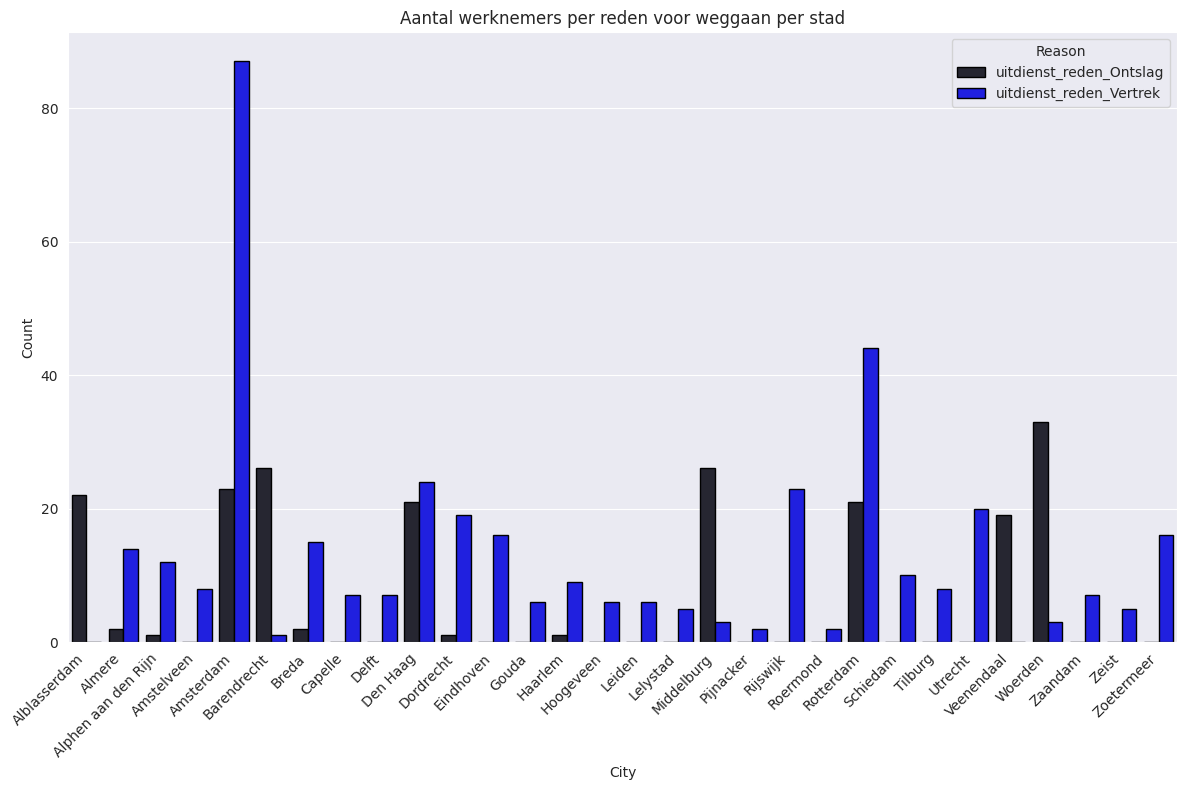

In [40]:
#om te onderzoeken in welke steden er veel uitstroom van werknemers is maken we deze plot
reasons_df = df[['stad', 'uitdienst_reden_Ontslag', 'uitdienst_reden_Vertrek']]

reasons_df = reasons_df.fillna(0)

reasons_count_per_city = reasons_df.groupby('stad').sum().reset_index()

melted_reasons = pd.melt(reasons_count_per_city, id_vars='stad', var_name='Reason', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='stad', y='Count', hue='Reason', data=melted_reasons, color='blue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Aantal werknemers per reden voor weggaan per stad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

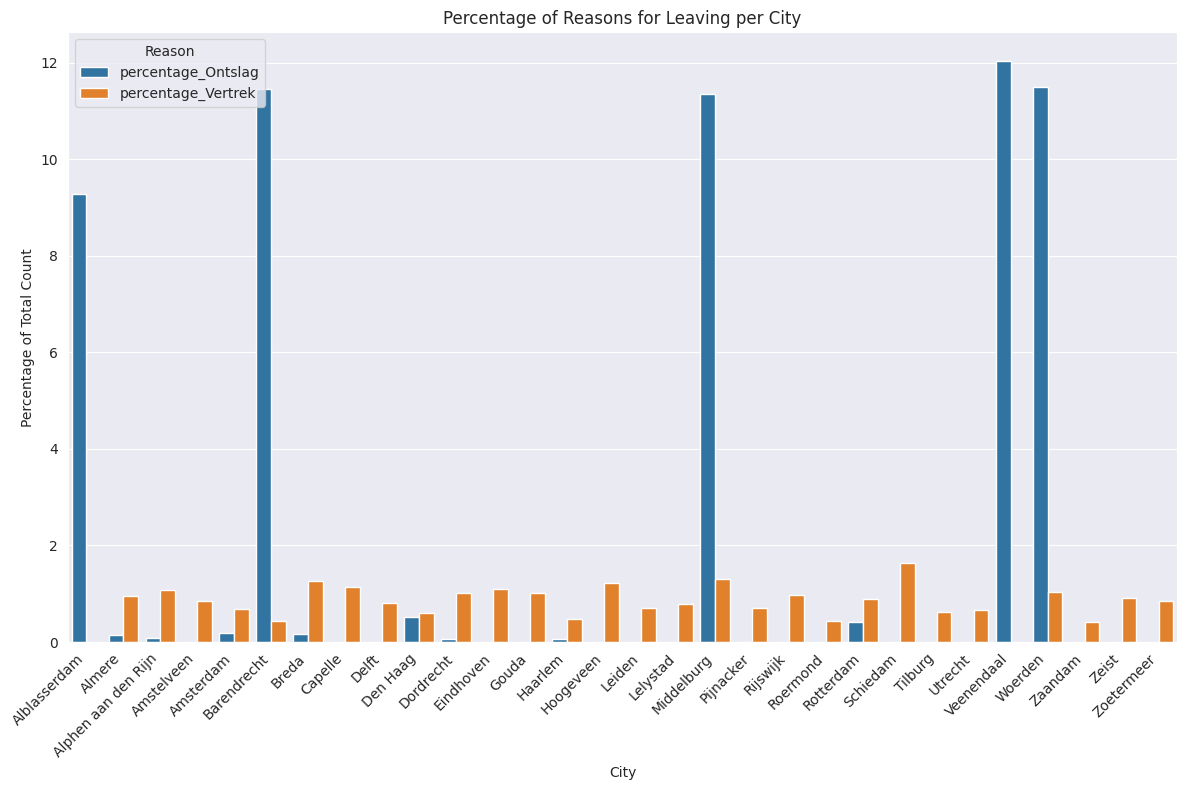

In [41]:
reasons_df = df[['stad', 'uitdienst_reden_Ontslag', 'uitdienst_reden_Vertrek']]

reasons_df = reasons_df.fillna(0)

reasons_count_per_city = reasons_df.groupby('stad').sum().reset_index()

total_count_per_city = df['stad'].value_counts().reset_index()
total_count_per_city.columns = ['stad', 'total_count']

merged_df = pd.merge(reasons_count_per_city, total_count_per_city, on='stad')

merged_df['percentage_Ontslag'] = (merged_df['uitdienst_reden_Ontslag'] / merged_df['total_count']) * 100
merged_df['percentage_Vertrek'] = (merged_df['uitdienst_reden_Vertrek'] / merged_df['total_count']) * 100

melted_reasons = pd.melt(merged_df, id_vars='stad', var_name='Reason', value_name='Percentage')

melted_reasons = melted_reasons[melted_reasons['Reason'].isin(['percentage_Ontslag', 'percentage_Vertrek'])]

plt.figure(figsize=(12, 8))
sns.barplot(x='stad', y='Percentage', hue='Reason', data=melted_reasons)
plt.xlabel('City')
plt.ylabel('Percentage of Total Count')
plt.title('Percentage of Reasons for Leaving per City')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

plt.show()

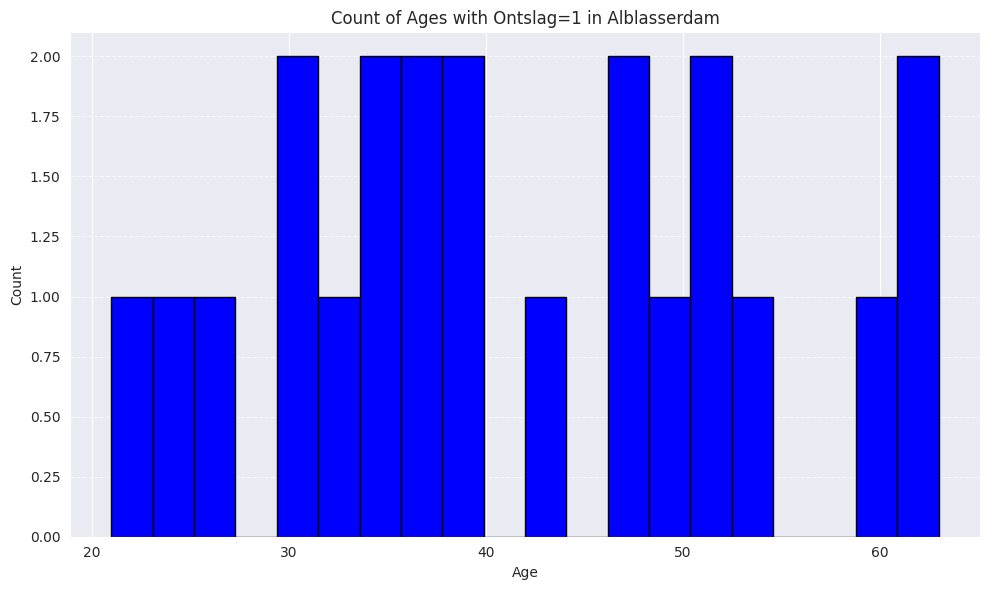

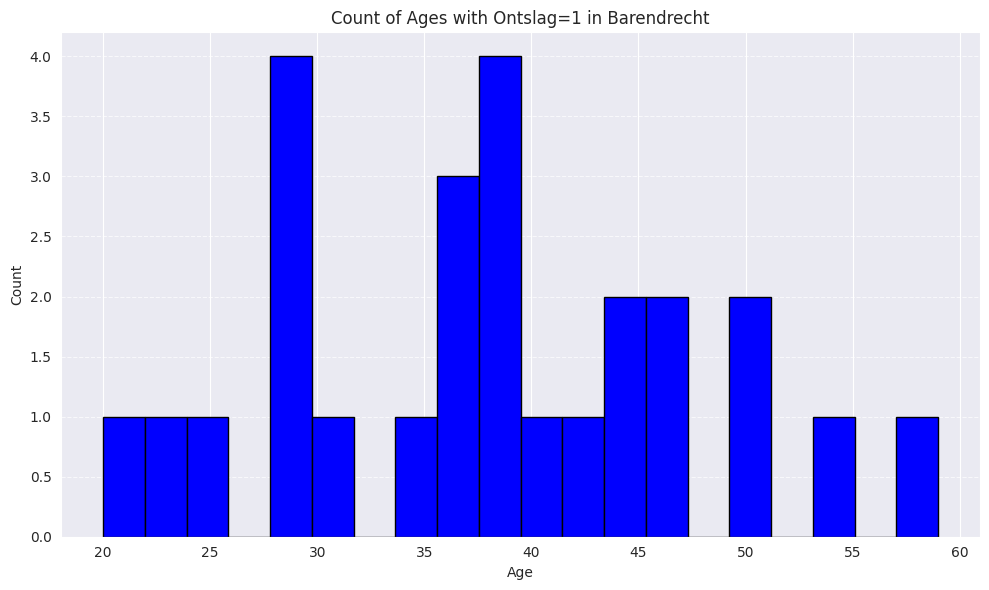

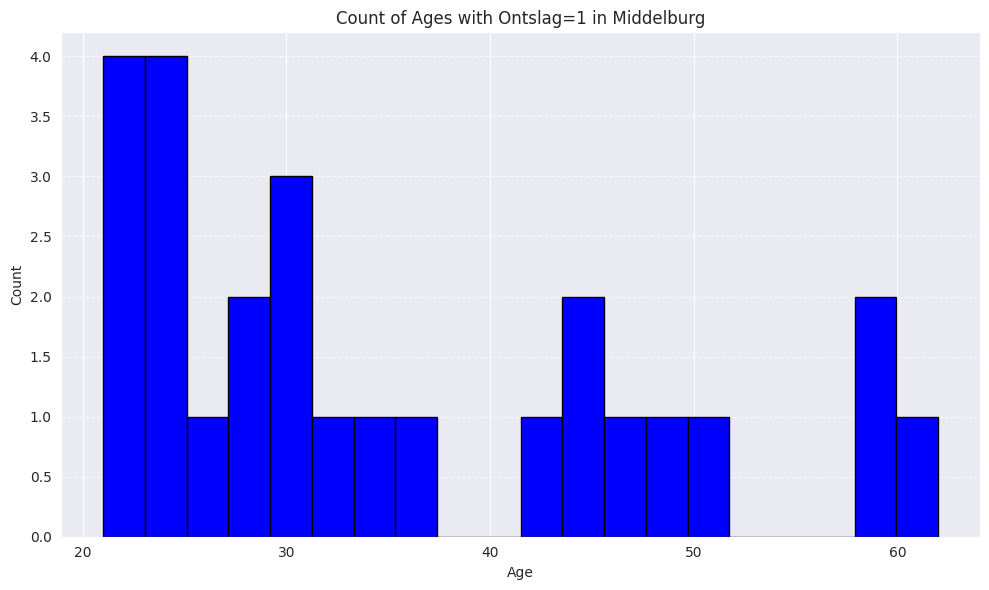

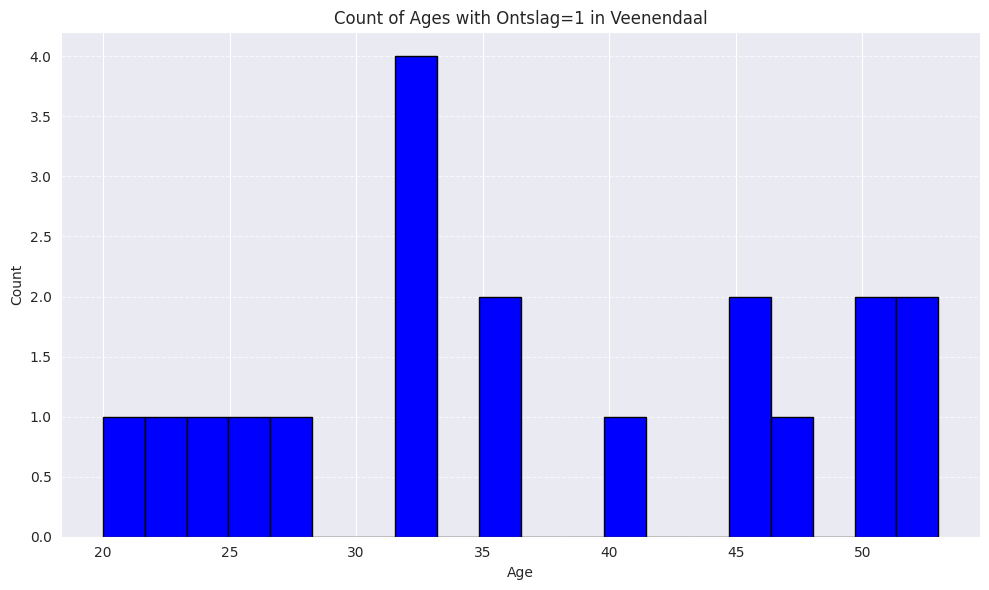

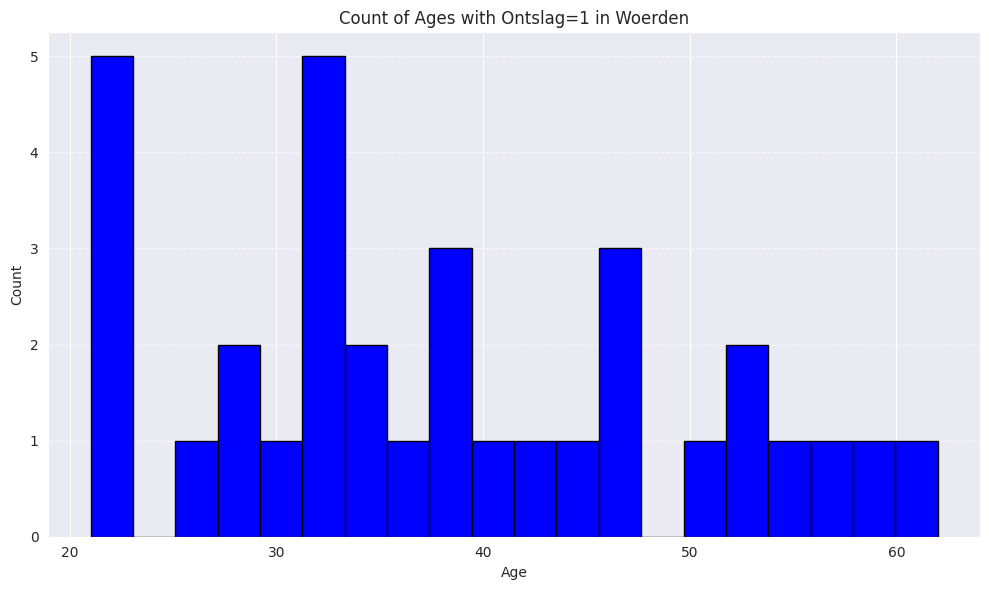

In [42]:
#om te bekijken wat de leeftijdsverdeling van uitgestroomde werknemers is per piek in de vertrekken per stad
#is deze plot gemaakt
cities_to_plot = ['Alblasserdam', 'Barendrecht', 'Middelburg', 'Veenendaal', 'Woerden']

for city in cities_to_plot:
    filtered_df = df[(df['uitdienst_reden_Ontslag'] == 1) & (df['stad'] == city)]

    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['leeftijd'], bins=20, color='blue', edgecolor='black')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(f'Count of Ages with Ontslag=1 in {city}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

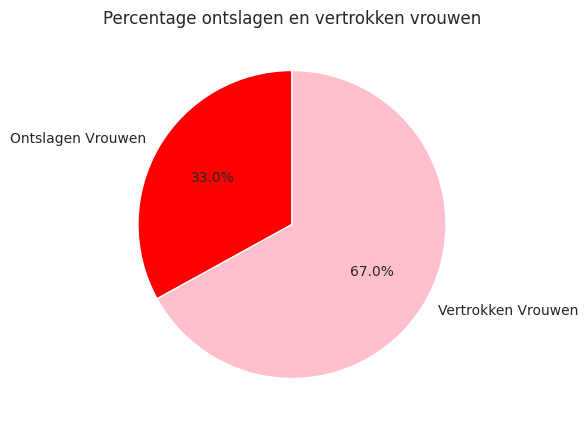

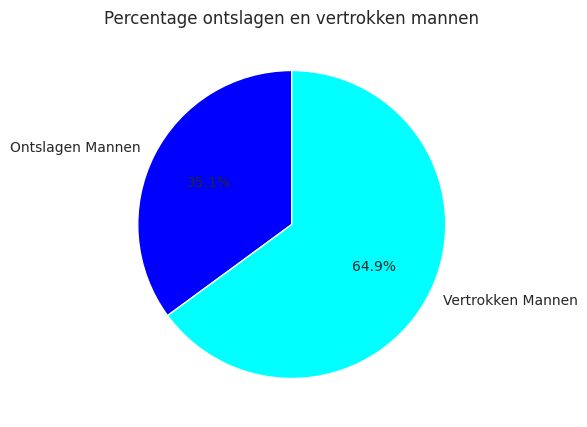

In [43]:
#percentages mannen en vrouwen, vertrokken en ontslagen
# leaving_age_df = df[df['uitdienst_reden'] != 'Niet van toepassing']

percentage_ontslagen_mannen = (df[df['geslacht_id_Man'] == 1]['uitdienst_reden_Ontslag'].sum() / len(df[df['geslacht_id_Man'] == 1])) * 100
percentage_vertrokken_mannen = (df[df['geslacht_id_Man'] == 1]['uitdienst_reden_Vertrek'].sum() / len(df[df['geslacht_id_Man'] == 1])) * 100

percentage_ontslagen_vrouwen = (df[df['geslacht_id_Vrouw'] == 1]['uitdienst_reden_Ontslag'].sum() / len(df[df['geslacht_id_Vrouw'] == 1])) * 100
percentage_vertrokken_vrouwen = (df[df['geslacht_id_Vrouw'] == 1]['uitdienst_reden_Vertrek'].sum() / len(df[df['geslacht_id_Vrouw'] == 1])) * 100

plt.figure(figsize=(10, 5))
labels = ['Ontslagen Vrouwen', 'Vertrokken Vrouwen']
sizes = [percentage_ontslagen_vrouwen, percentage_vertrokken_vrouwen]
colors = ['red', 'pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage ontslagen en vertrokken vrouwen')
plt.show()

plt.figure(figsize=(10, 5))
labels = ['Ontslagen Mannen', 'Vertrokken Mannen']
sizes = [percentage_ontslagen_mannen, percentage_vertrokken_mannen]
colors = ['blue', 'cyan']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage ontslagen en vertrokken mannen')
plt.show()

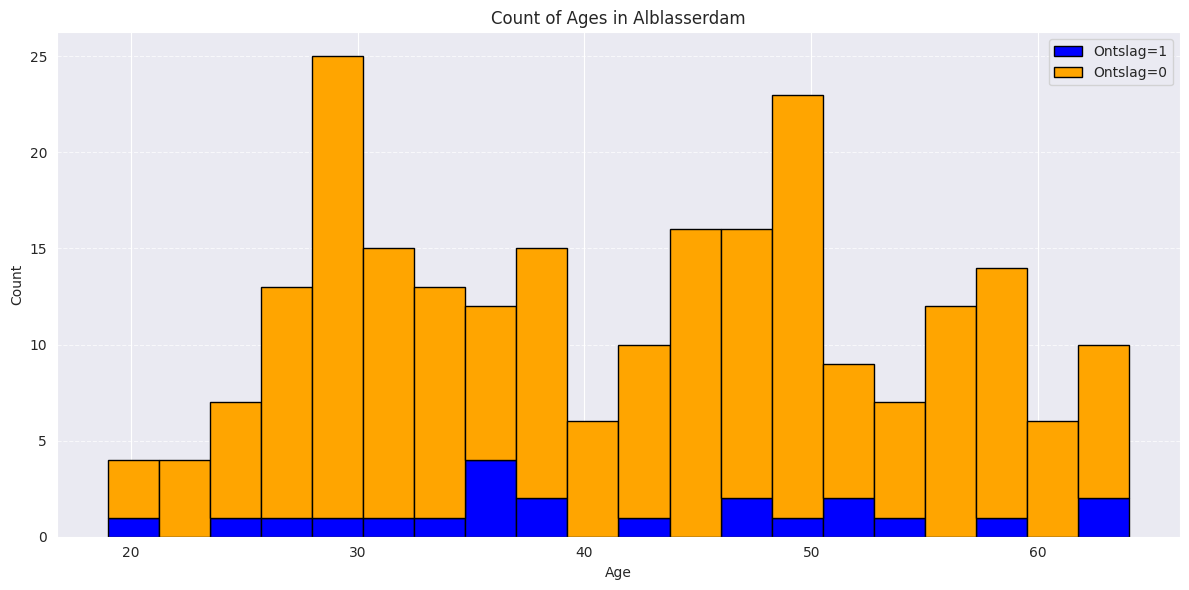

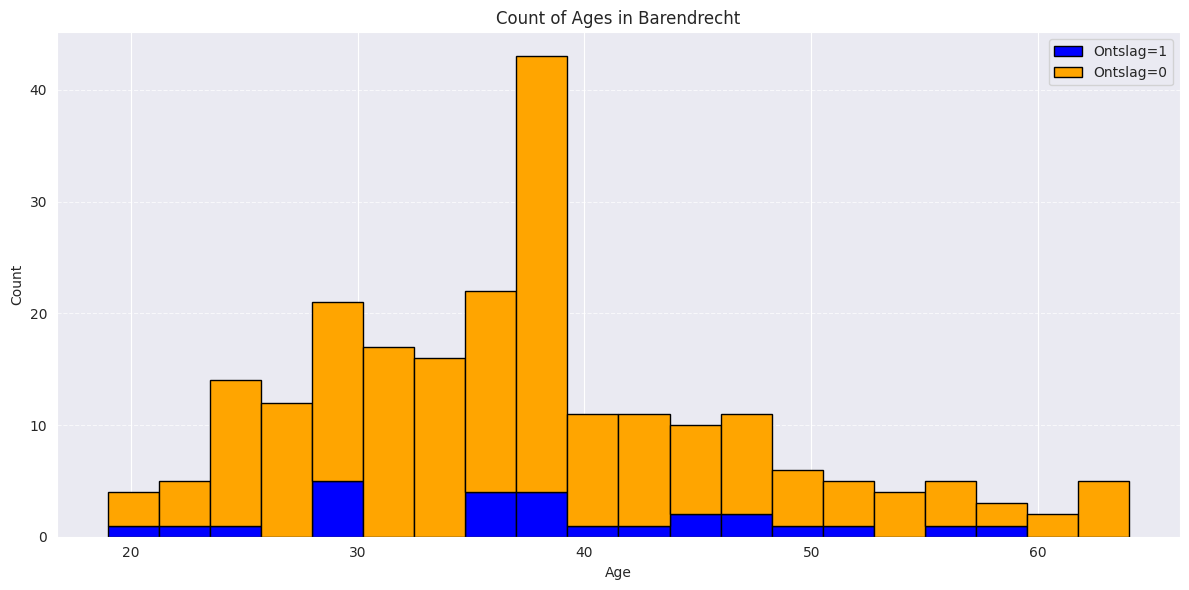

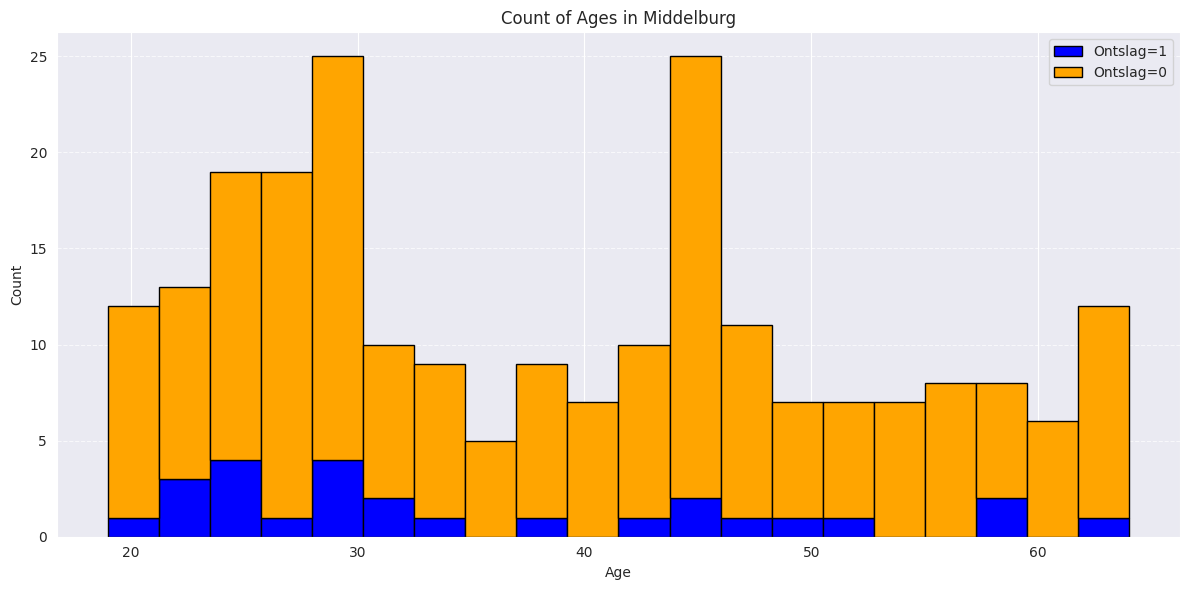

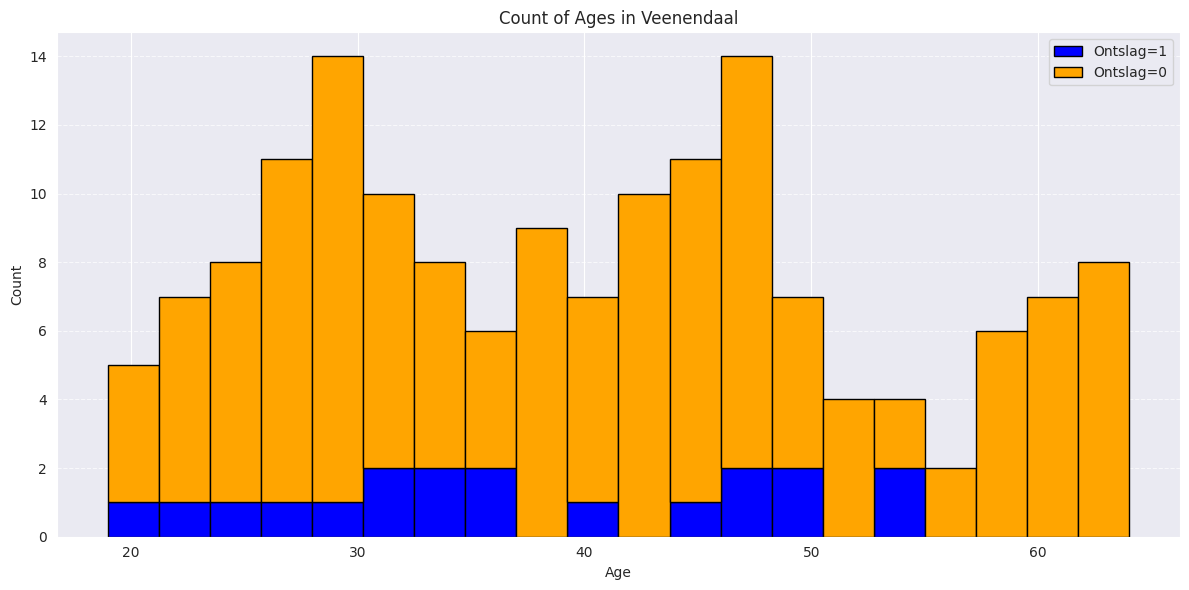

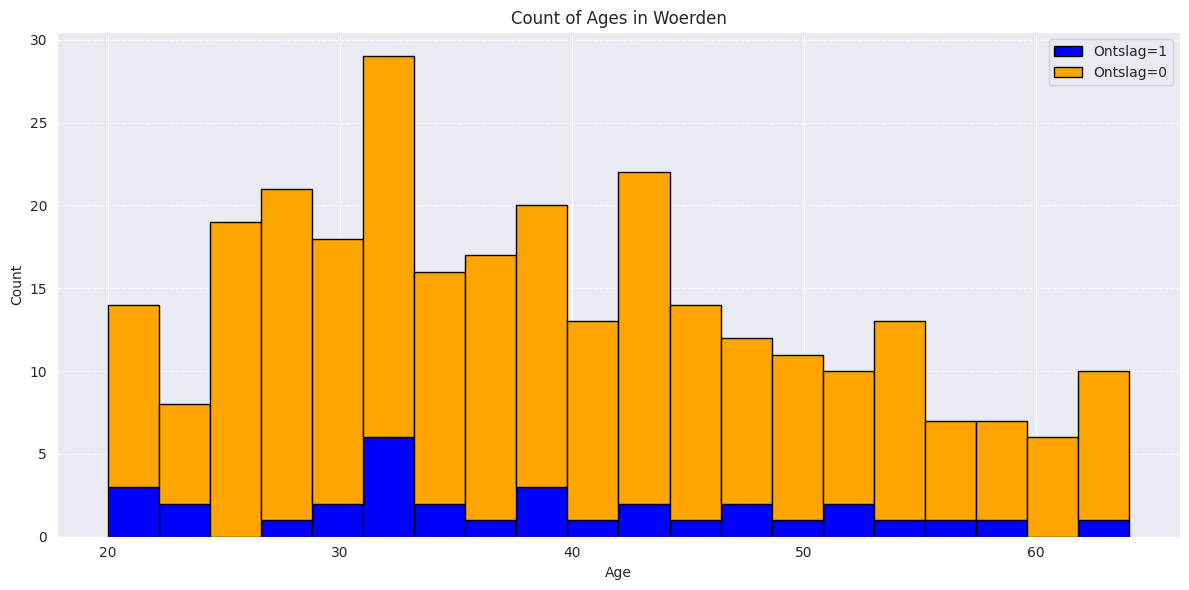

In [44]:
cities_to_plot = ['Alblasserdam', 'Barendrecht', 'Middelburg', 'Veenendaal', 'Woerden']

for city in cities_to_plot:
    df_city = df[df['stad'] == city]

    count_ontslag_1 = df_city[df_city['uitdienst_reden_Ontslag'] == 1]['leeftijd']
    count_ontslag_0 = df_city[df_city['uitdienst_reden_Ontslag'] == 0]['leeftijd']

    plt.figure(figsize=(12, 6))

    plt.hist([count_ontslag_1, count_ontslag_0], bins=20, stacked=True, color=['blue', 'orange'], edgecolor='black', label=['Ontslag=1', 'Ontslag=0'])
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(f'Count of Ages in {city}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

In [45]:
#column aantal geboortes aangemaakt
birth_df = pd.read_csv('Datasets/geboortecijfers_2022.csv', sep=';')
birth_df
birth_df.replace('Pijnacker-Nootdorp', 'Pijnacker', inplace=True)
birth_df.replace('s-Gravenhage', 'Den Haag', inplace=True)
birth_df.replace('Zaanstad', 'Zaandam', inplace=True)
birth_df.replace('Capelle aan den IJssel', 'Capelle', inplace=True)
# Assuming birth_df and start_df are your DataFrames
merged_df = df.merge(birth_df, left_on='stad', right_on='Gemeente', how='left')
birth_df.info()
# Add the required columns to start_df
df['aantal_geboortes'] = merged_df['Levend geborenen per duizend inwoners']
df['aantal_geboortes_pf'] = merged_df["Levend geborenen per duizend vrouwen (15 tot 50 jaar)"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Gemeente                                               344 non-null    object
 1   Levend geborenen per duizend inwoners                  344 non-null    object
 2   Levend geborenen per duizend vrouwen (15 tot 50 jaar)  344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48849 entries, 0 to 48848
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   werknemer_id                         48849 non-null  int64         
 1   datum                                48849 non-null  datetime64[ns]
 2   geboortedatum                        48849 non-null  datetime64[ns]
 3   startdatum                           48849 non-null  datetime64[ns]
 4   einddatum                            48849 non-null  datetime64[ns]
 5   leeftijd                             48849 non-null  float64       
 6   dienstperiode                        0 non-null      float64       
 7   stad                                 48849 non-null  object        
 8   klant_id                             48849 non-null  int64         
 9   geslacht_id                          48849 non-null  object        
 10  geslacht  

# Create a DataFrame for model training

In [47]:
# Assuming df is your DataFrame

columns_to_remove = [
    'datum',
    'einddatum',
    'afdeling_Accountant',
    'afdeling_Administratief medewerker',
    'afdeling_BI',
    'afdeling_Boekhouder',
    'afdeling_Business analist',
    'afdeling_Business controller',
    'afdeling_Business development',
    'afdeling_Credit controller',
    'afdeling_Financial controller',
    'afdeling_HR',
    'afdeling_IT',
    'afdeling_Legal',
    'afdeling_Marketing',
    'afdeling_Office manager',
    'afdeling_Project controller',
    'business_unit_Detachering',
    'business_unit_Intern',
    'werknemer_id',
    'klant_id',
    'geboortedatum',
    'geslacht_id',
    'geslacht',
    'status',
    'geslacht_id_Man',
    'geslacht_id_Vrouw',
    'stad',
    'aantal_geboortes_pf'
]

df.drop(columns=columns_to_remove, inplace=True)


temp_df = pd.read_csv('Datasets/cleaned_data.csv')
df['afdeling'] = temp_df['afdeling']
df['business_unit'] = temp_df['business_unit']

# Laat het resultaat zien
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48849 entries, 0 to 48848
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   startdatum                           48849 non-null  datetime64[ns]
 1   leeftijd                             48849 non-null  float64       
 2   dienstperiode                        0 non-null      float64       
 3   status_jaar                          48849 non-null  int64         
 4   status_actief                        48849 non-null  int64         
 5   status_beëindigd                     48849 non-null  int64         
 6   reisafstand                          48849 non-null  int64         
 7   uitdienst_reden_Niet van toepassing  48849 non-null  bool          
 8   uitdienst_reden_Ontslag              48849 non-null  bool          
 9   uitdienst_reden_Vertrek              48849 non-null  bool          
 10  aantal_geb

# Store the Dataframe 

In [48]:
df.to_csv('Datasets/trainingdata.csv', sep=',', index=False)